<a href="https://colab.research.google.com/github/aaroncdvd/HRBS-CA_Python_AI/blob/main/SampleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample NN

[Click This Link For Sample NN on Google Sheets](https://docs.google.com/spreadsheets/d/1wS7riEg9P9vAzuik7S-TPu1Zk3OgCNgVlWHuoncF8R8/edit?usp=sharing)

[Intro to Matrix Multiply np.dot()](https://towardsdatascience.com/a-complete-beginners-guide-to-matrix-multiplication-for-data-science-with-python-numpy-9274ecfc1dc6)

![](https://miro.medium.com/max/1838/1*YGcMQSr0ge_DGn96WnEkZw.png)


[Intro to Matrix Transpose np.data.T](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.geeksforgeeks.org%2Fpython-program-to-find-transpose-of-a-matrix%2F&psig=AOvVaw2wjWPPPffkOKPzct1y2MqU&ust=1617919820057000&source=images&cd=vfe&ved=0CA0QjhxqFwoTCMjHzJ-T7e8CFQAAAAAdAAAAABAD)

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/matrix-transpose.jpg)

In [1]:
import numpy as np
import pandas as pd

In [2]:
inputs = np.array([[0, 1, 0], # input data
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
X=pd.DataFrame(inputs)

In [3]:
outputs = np.array([[0], [0], [0], [1], [1], [1]]) # output data
y=pd.DataFrame(outputs)

In [4]:
data=pd.concat([X,y],axis=1)
data

,0,1,2,0
0,0,1,0,0
1,0,1,1,0
2,0,0,0,0
3,1,0,0,1
4,1,1,1,1
5,1,0,1,1


In [5]:
weights = np.array([[.50], [.50], [.50]]) # initialize weights as .50 for simplicity
error_history = []
epoch_list = []
epoch = 0

In [6]:
pd.DataFrame(weights)

,0
0,0.5
1,0.5
2,0.5


In [18]:
epoch += 1 # add one to epoch alternative to > for epoch in range(250):
hidden = 1/(1+np.exp(-np.dot(inputs, weights))) # make hidden : feed forward

error    = outputs - hidden # make error based on the outputs - hidden
delta    = error * (hidden*(1-hidden)) # make delta based on error
weights += np.dot(inputs.T, delta) # update weights based on delta

error_history.append(np.average(np.abs(error))) # add error to error_history
epoch_list.append(epoch) # add epoch to epoch_list

In [24]:
hidden

array([[0.49631766],
       [0.58758688],
       [0.5       ],
       [0.69533896],
       [0.7648036 ],
       [0.76744281]])

In [20]:
error

array([[-0.49631766],
       [-0.58758688],
       [-0.5       ],
       [ 0.30466104],
       [ 0.2351964 ],
       [ 0.23255719]])

In [25]:
delta

array([[-0.12407268],
       [-0.14238907],
       [-0.125     ],
       [ 0.06454021],
       [ 0.04230691],
       [ 0.04150549]])

In [21]:
weights

array([[ 0.97355223],
       [-0.23888448],
       [ 0.3101515 ]])

In [26]:
error_history

[0.44707092063439274, 0.4193299336210381, 0.3927198606267786]

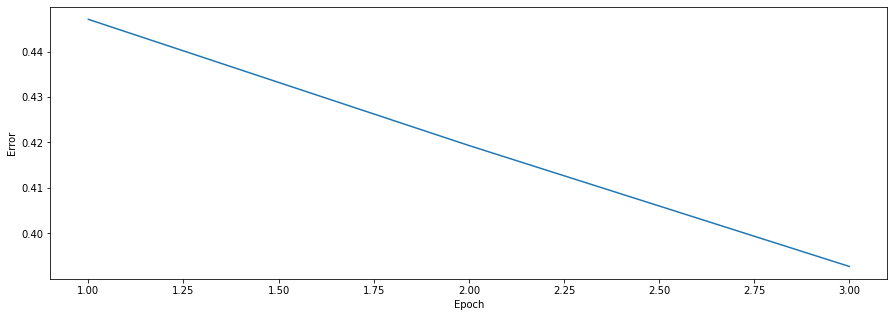

In [22]:
import matplotlib.pyplot as plt # plot error during training
plt.figure(figsize=(15,5)) # plot the error over the entire training duration
plt.plot(epoch_list, error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

##Run 250 Epochs

In [27]:
for epoch in range(250):
  hidden = 1/(1+np.exp(-(np.dot(inputs, weights)))) # flow forward and produce an output
  
  error    = outputs - hidden # go back though the network to make corrections based on the output
  delta    = error * (hidden*(1-hidden))
  weights += np.dot(inputs.T, delta)

  error_history.append(np.average(np.abs(error))) # keep track of the error history over each epoch
  epoch_list.append(epoch)

##Make Predictions

In [28]:
example1 = np.array([[1, 1, 0]]) # create new example #1 to predict
example1

array([[1, 1, 0]])

In [29]:
example2 = np.array([[0, 1, 1]]) # create new example #2 to predict
example2

array([[0, 1, 1]])

In [30]:
prediction1 = 1/(1+np.exp(-np.dot(example1, weights)))
prediction2 = 1/(1+np.exp(-np.dot(example2, weights)))

print(prediction1, ' - Correct: ', example1[0][0]) # print the predictions for both examples
print(prediction2, ' - Correct: ', example2[0][0])

[[0.90560244]]  - Correct:  1
[[0.06813766]]  - Correct:  0


##Original NN Example

In [41]:
class NeuralNetwork: # create NeuralNetwork class

    def __init__(self, inputs, outputs): # intialize variables in class
        self.inputs  = inputs
        self.outputs = outputs
        self.weights = np.array([[.50], [.50], [.50]]) # initialize weights as .50 for simplicity
        self.error_history = []
        self.epoch_list = []

    def sigmoid(self, x, deriv=False): #activation function ==> S(x) = 1/1+e^(-x)
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self): # data will flow through the neural network.
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    def backpropagation(self): # going backwards through the network to update weights
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    def train(self, epochs=250): # train the neural net for 25,000 iterations
        for epoch in range(epochs):
            self.feed_forward() # flow forward and produce an output
            self.backpropagation() # go back though the network to make corrections based on the output
            self.error_history.append(np.average(np.abs(self.error))) # keep track of the error history over each epoch
            self.epoch_list.append(epoch)

    def predict(self, new_input): # function to predict output on new and unseen input data
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

In [42]:
NN = NeuralNetwork(inputs, outputs) # create neural network

In [43]:
NN.train() 

In [44]:
# create two new examples to predict
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

In [45]:
# print the predictions for both examples
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

[[0.90504239]]  - Correct:  1
[[0.06856018]]  - Correct:  0


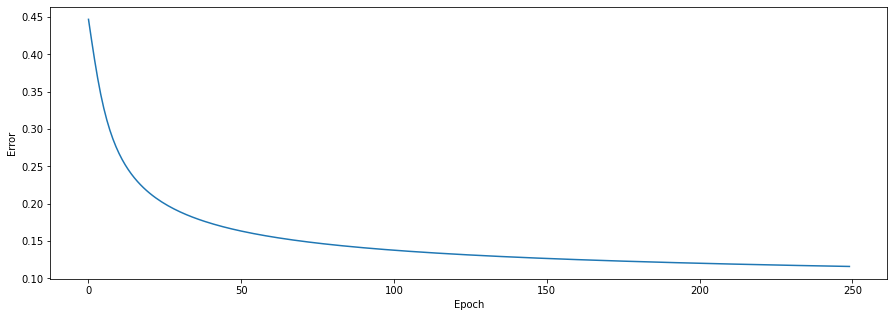

In [46]:
# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()